In [71]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import make_scorer, f1_score, silhouette_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.mixture import GaussianMixture

from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('./data/snsdata.csv')
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [4]:
# Задание 4.1

# Мы будем реализовывать алгоритм только на признаках, которые заключают в себе ключевые слова, встречающиеся в сообщениях подростка.
# Удалите все остальные признаки. Какова размерность вашего текущего набора данных?

data = df.iloc[:, 4:]
data.shape

(30000, 36)

In [5]:
# Задание 4.2

# Теперь нормализуйте данные с помощью StandardScaler ( ) . Для получившейся матрицы нормализованных признаков выведите самое первое
# значение в самой первой строке (X norm 01 Г 01). Ответ округлите до двух знаков после точки-разделителя.

scaller = StandardScaler()
X_norm = scaller.fit_transform(data)
print(round(X_norm[0][0],2))


-0.33


In [6]:
# Задание 4.3

# Реализуйте алгоритм k-means с девятью кластерами. В качестве значения параметра random state возьмите число 42. Выведите
# получившееся значение инерции (model.inertia ). Ответ округлите до двух знаков после точки-разделителя.

km_segm = KMeans(n_clusters=9, random_state=42)
prediction = km_segm.fit_predict(X_norm)

print(km_segm.inertia_)


857169.1033997748


In [7]:
# Задание 4.4

# Сколько подростков относится к наиболее многочисленному кластеру?
# А сколько - к самому малочисленному?
data_km = data.copy()
data_km['cluster'] = prediction
data_km['cluster'].value_counts(ascending=True)

2        1
5      493
8      716
6      762
4      851
1      930
7     2098
3     4490
0    19659
Name: cluster, dtype: int64

In [8]:
# Задание 4.5

# 1. Мы выделили девять кластеров, но, возможно, это далеко не оптимальное количество. Давайте попробуем применить разные методы для
# нахождения числа кластеров. Будем выбирать количество кластеров из диапазона от 3 до 9.
# Для начала примените метод локтя . Каким в этом случае будет оптимальное число кластеров? Если оно не идентифицируется однозначно,
# запишите количество кластеров, при котором достигается наименьшая инерция.

inertia = []
clusters = [x for x in range(3,10)]
for cluster in clusters:
    km_elbow = KMeans(n_clusters=cluster, random_state=42)
    km_elbow.fit(X_norm)
    inertia.append(km_elbow.inertia_)
inertia

[994116.3386407971,
 965032.1004210366,
 939457.1761824483,
 913395.657292953,
 892309.5548621647,
 872318.1671214475,
 857169.1033997748]

<AxesSubplot: >

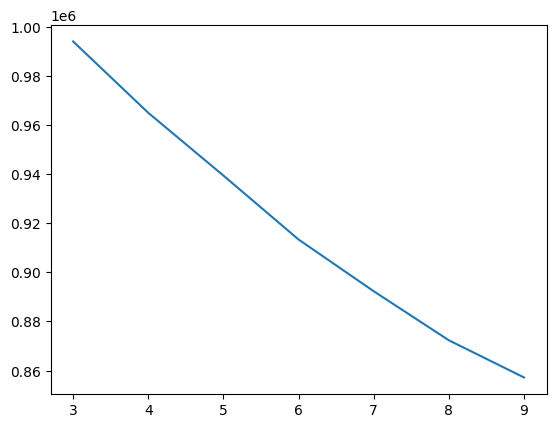

In [9]:
sns.lineplot(
    x=clusters,
    y=inertia
)

<AxesSubplot: >

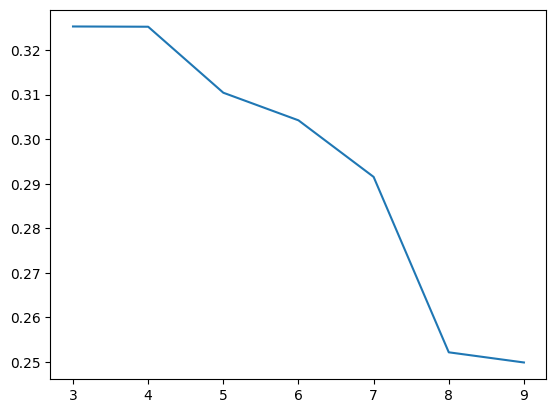

In [10]:
# 2. Теперь попробуйте подобрать оптимальное количество кластеров с помощью коэффициента силуэта. Каким оно будет?
# Если невозможно однозначно определить количество кластеров, при котором достигается максимальное значение коэффициента силуэта,
# выберите наименьшее количество кластеров из подходящих.
silhouette = []
for cluster in clusters:
    km_silh = KMeans(n_clusters=cluster, random_state=42)
    km_silh.fit_predict(X_norm)
    silhouette.append(silhouette_score(X_norm, km_silh.labels_))

sns.lineplot(
    x=clusters,
    y=silhouette
)


In [11]:
# Задание 4.6

# Мы будем использовать результаты, полученные в предыдущем задании с помощью коэффициента силуэта.
# Реализуйте сегментацию подростков на выбранном количестве кластеров.
# Для каждого кластера составьте топ-10 самых частых слов, назовём их ключевыми. Для этого сгруппируйте данные по кластерам, в каждом
# кластере вычислите среднее по каждому признаку, отсортируйте данные по убыванию и выделите первые 10 строк.
# Найдите среди ключевых слов те, которые характерны для каждого кластера, то есть встречаются в каждом из них.

km_clust = KMeans(n_clusters=3, random_state=42)
data_3_cl = data.copy()
data_3_cl['clusters']= km_clust.fit_predict(X_norm)
data_3_cl.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,clusters
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


In [70]:
top_10 = []

top_3cl = data_3_cl.groupby('clusters').mean().T

for cluster in top_3cl.columns:
    top_words = top_3cl[cluster].sort_values(ascending=False).index[:10].tolist()
    top_words = set(top_words)
    top_10.append(top_words)

set.intersection(*top_10)

{'dance', 'god', 'hair', 'music'}

In [72]:
# Задание 4.7

# Итак, с k-means мы потренировались - теперь перейдём к ЕМ-алгоритму.
# Реализуйте ЕМ-алгоритм (GaussianMixture) для такого же количества кластеров, как и в предыдущем задании. В качестве значения параметра
# random state возьмите число 42.
# Сколько подростков алгоритм отнёс к самому многочисленному кластеру?
gm = GaussianMixture(n_components=3, random_state=42)
gm_cluster = data.copy()
gm_cluster['cluster'] = gm.fit_predict(X_norm)
display(gm_cluster.head())

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


In [73]:
gm_cluster['cluster'].value_counts()

0    23426
1     6573
2        1
Name: cluster, dtype: int64

In [83]:
perv = gm_cluster.query("cluster == 2").T
perv

,14187
basketball,0
football,2
soccer,0
softball,0
volleyball,0
swimming,1
cheerleading,0
baseball,0
tennis,0
sports,0
